<a href="https://www.kaggle.com/alperenkaran/understanding-p-value-in-a-statistical-test?scriptVersionId=88893658" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Understanding p-value in statistical test

I will explain and demonstrate using independent samples (between subjects) t-test.

For example, I want to know whether **Harvard** and **Stanford** university students' IQ levels are significantly different from each other.

In [1]:
import numpy as np; np.random.seed(0)
from scipy import stats
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

## Part 1: Assume the null hypothesis

That is, there is no difference between the groups (Harvard and Stanford students have the same IQ levels). 

Assume also that the data is normally distributed.

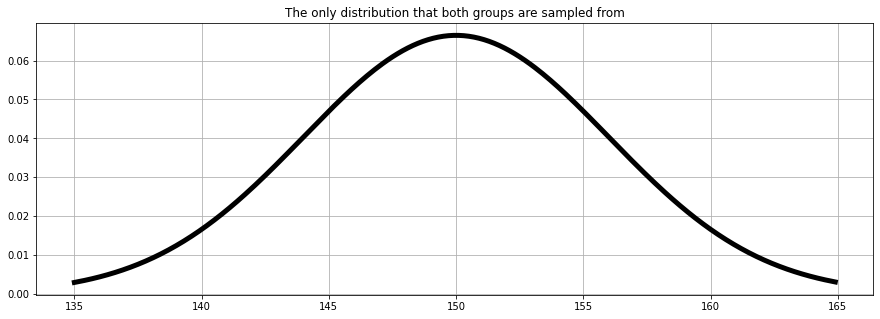

In [2]:
x = np.arange(135,165,.1)
y = stats.norm.pdf(x, 150, 6)

plt.figure(figsize=(15,5))
plt.plot(x, y, linewidth=5, c='black')
plt.title('The only distribution that both groups are sampled from')
plt.grid()
plt.show()

## Part 2: A very likely situation

Assume we sample 4 students from both university. A likely situation is as follows.

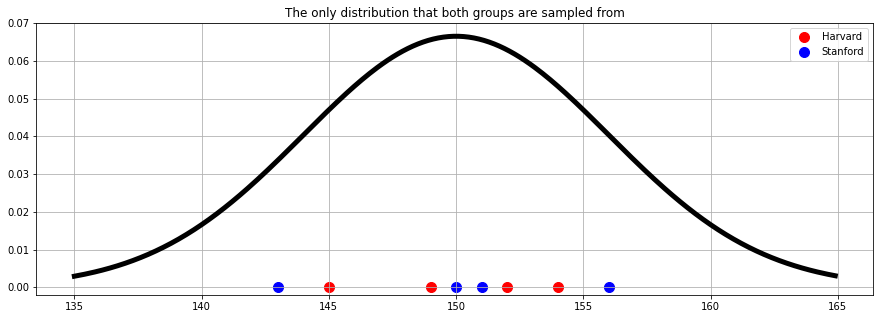

In [3]:
x = np.arange(135,165,.1)
y = stats.norm.pdf(x, 150, 6)

plt.figure(figsize=(15,5))
plt.plot(x, y, linewidth=5, c='black')
plt.title('The only distribution that both groups are sampled from')
plt.scatter([145, 149, 152, 154],[0,0,0,0], c='red', s=100, label='Harvard')
plt.scatter([143, 151, 150, 156],[0,0,0,0], c='blue', s=100, label='Stanford')
plt.grid()
plt.ylim(-0.002,.07)
plt.legend()
plt.show()

A very very unlikely situation is all Stanford points are on the left, and all Harvard points are on the right, or vice versa.

In such unlikely cases, the statistical test will return a significant p-value, resulting in a Type I error.

This means, if you try "hard enough" you will find samples that fit your alternative hypothesis.

## Part 3: Sample 10 000 times, and run t-test for each of them

I will sample two groups of size 4 from the same normal distribution. 

I will repeat this 10 000 times, and run a t-test for each of them.

Let's pick $\alpha = .05$. This means, if $p < .05$, we say that there is a significant difference.

$\alpha$ is called the chance level.

In [4]:
number_of_significant_differences = 0

for i in tqdm(range(10000)):
    sample1 = np.random.normal(loc=150, scale=6, size=4)
    sample2 = np.random.normal(loc=150, scale=6, size=4)
    p = stats.ttest_ind(sample1, sample2)[1]
    
    if p < .05:
        number_of_significant_differences += 1

  0%|          | 0/10000 [00:00<?, ?it/s]

In [5]:
print('The number of significant differences is', number_of_significant_differences)

The number of significant differences is 502


Remember that we conducted the experiment 10 000 times, and (by chance) found a significant difference 502 times.

So, the probability of finding a significant difference by chance is $\frac{502}{10 000} = .0502 \approx .05 = \alpha$

## Part 4: Try it yourself

Pick $\alpha$ differently, for example, $\alpha=.01$. Also change the sample size. 

The number of significant differences will not be affected by the sample size, and you will observe approximately $10 000 \times \alpha$ significant differences.